# Лабораторная работа №5: Элементы регрессионного анализа. Выборочные прямые среднеквадратической регрессии. Корреляционные отношения

Выполнили студентки гр. 8383 Ишанина Людмила и Сырцова Екатерина. Вариант №6.

## Цель работы

Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной (в том числе и линейной) корреляционной связи.

## Основные теоретические положения

**Метод наименьших квадратов (МНК)** - метод, основанный на поиске минимума суммы квадратов отклонений значений некоторых функций от заданного множества значений.
МНК является одним из основных методов регрессионного анализа и применяется для оценки параметров регрессионных моделей на основе выборочных данных:
$$M(X/y) = q_1(y), M(Y/x) = q_2(x)$$

**Линейная функция среднеквадратической регрессии** $Y$ на $X$: $g(x) = m(Y/x) = m(Y) + r_{xy}\frac{\sigma_y}{\sigma_x}[x - m(X)]$.
Коэффициент $\rho_{xy} = r_{xy}\frac{\sigma_y}{\sigma_x}$ называют **коэффициентом регрессии** $Y$ на $X$.
**Остаточная дисперсия** случайной величины $Y$ относительно случайной величины $X$ равна $\sigma_y^2(1 - r_{xy}^2)$.

**Линейная функция среднеквадратической регрессии** $Y$ на $Y$: $g(y) = m(X/y) = m(X) + r_{xy}\frac{\sigma_x}{\sigma_y}[y - m(Y)]$.
Коэффициент $\rho_{xy} = r_{xy}\frac{\sigma_x}{\sigma_y}$ называют **коэффициентом регрессии** $X$ на $Y$.
**Остаточная дисперсия** равна $\sigma_x^2(1 - r_{xy}^2)$.

**Выборочные прямые среднеквадратической регрессии**
$$\bar{x}_y = \bar{x}_в + \bar{r}_{xy}\frac{S_x}{S_y}(y - \bar{y}_в)$$
$$\bar{y}_x = \bar{y}_в + \bar{r}_{xy}\frac{S_y}{S_x}(x - \bar{x}_в)$$

Для оценки корреляционной зависимости между случайными величинами в общем, а не только линейной, может быть использована так называемое **корреляционное отношение**.
Определим $D_{внгр}$ - **внутригрупповую дисперсию**, как взвешенную по объемам групп среднюю арифметическую групповых дисперсий.
$$D_{внгр} = \frac{\sum{(x_i - \bar{x}_{y_i})^2} \cdot n_i}{\sum{n_i}}$$
Определим $D_{межгр}$ **межгрупповую дисперсию**, как дисперсию условных (групповых) средних $\bar{x}_{y_i}$ относительно выборочной средней $\bar{x}_в$.
$$D_{межгр} = \frac{\sum{(\bar{x}_{y_i} - \bar{x}_в)^2} \cdot n_i}{\sum{n_i}}$$
Оценку **общей дисперсии** $X$ можно представить, как сумму внутригрупповой и межгрупповой дисперсий: $D_{общ} = D_{внгр} + D_{межгр}$.
Определим $\bar{\eta}_{xy}$ - **выборочное корреляционное отношение** $X$ к $Y$  соответствии с выражением $$\bar{\eta}_{xy} = \frac{\bar{\sigma}_{\bar{x}_y}}{\bar{\sigma}_x}$$
где $\bar{\sigma}_{\bar{x}_y} = \sqrt{D_{межгр}}$, $\bar{\sigma}_x = \sqrt{D_{общ}}$ - выборочные значения СКВО $\bar{x}_y$ и $X$ соответственно.
Аналагично определяется **выборочное корреляционное отношение** $Y$ к $X$  соответствии с выражением $$\bar{\eta}_{yx} = \frac{\bar{\sigma}_{\bar{y}_x}}{\bar{\sigma}_y}$$.

## Постановка задачи

Для заданной двумерной выборки $(X,Y)$ построить уравнения выборочных прямых среднеквадратической регрессии. Полученные линейные функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Полученные результаты содержательно проинтерпретировать.
### Порядок выполнения работы
1. Отобразить двумерную выборку на графике.
2. Для заданной выборки построить уравнения средней квадратичной регрессии $x$ на $y$ и $y$ на $x$ соответственно. Построить полученные прямые на множестве выборки. Объяснить результаты.
3. Составить корреляционную таблицу для нахождения выборочного корреляционного отношения. Убедиться, что неравенства $\eta_{xy} \geq |r_{xy}|$ и $\eta_{yx} \geq |r_{xy}|$ выполняются.
4. Для заданной выборки построить корреляционную кривую параболического вида $y = \beta_2 x^2 + \beta_1 x + \beta_0$, а также корреляционную кривую в зависимости от номера варианта и сделать выводы: Дробно-рациональная функция: $y = \frac{x}{\beta_1x+\beta_0}$.
5. Дополнительное необязательное задание: Вычислить следующие показатели качества регрессии для каждой кривой и сделать выводы:
    теоретический коэффициент детерминации $R^2$;
    средняя квадратическая ошибка $S_\epsilon$;
    средняя ошибка аппроксимации (приближения) $A$.

## Выполнение работы
### Двумерная выборка
Отобразим двумерную выборку на графике:

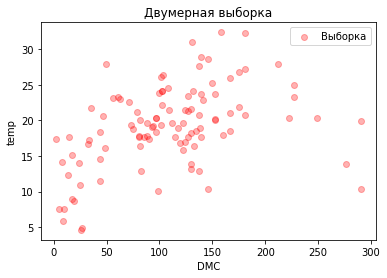

In [255]:
import pandas as pd
from scipy.optimize import curve_fit
from pylab import *
from scipy.linalg import *
warnings.filterwarnings('ignore')

data = pd.read_csv('forestfires_105.csv', usecols=['DMC', 'temp'], sep=',')

data_DMC = data.loc[:,['DMC']]
ranked_DMC = data_DMC.sort_values(by='DMC')
k = 1 + math.floor(3.322 * math.log10(ranked_DMC.size))
h_DMC = (ranked_DMC['DMC'].max() - ranked_DMC['DMC'].min()) / k
points = np.concatenate((np.arange(ranked_DMC['DMC'].min(), ranked_DMC['DMC'].max(), h_DMC), [ranked_DMC['DMC'].max()]))
interval_DMC = ranked_DMC.groupby(pd.cut(ranked_DMC['DMC'], points)).size().reset_index(name='frequency')
interval_DMC['frequency'][0] += 1
table_DMC = pd.DataFrame()
table_DMC['DMC'] = interval_DMC['DMC']
table_DMC['x_i'] = interval_DMC['DMC'].apply(lambda x: x.mid).astype('float')
table_DMC['n_i'] = interval_DMC['frequency']
center_DMC = table_DMC['x_i'][math.floor(k / 2)]
table_DMC['u_i'] = table_DMC['x_i'].apply(lambda x: (x - center_DMC) / h_DMC)
table_DMC['n_cum'] = np.cumsum(interval_DMC['frequency'])

data_temp = data.loc[:,['temp']]
ranked_temp = data_temp.sort_values(by='temp')
k = 1 + math.floor(3.322 * math.log10(ranked_DMC.size))
h_temp = (ranked_temp['temp'].max() - ranked_temp['temp'].min()) / k
points = np.concatenate((np.arange(ranked_temp['temp'].min(), ranked_temp['temp'].max(), h_temp), [ranked_temp['temp'].max()]))
interval_temp = ranked_temp.groupby(pd.cut(ranked_temp['temp'], points)).size().reset_index(name='frequency')
interval_temp['frequency'][0] += 1
table_temp = pd.DataFrame()
table_temp['temp'] = interval_temp['temp']
table_temp['x_i'] = interval_temp['temp'].apply(lambda x: x.mid).astype('float')
table_temp['n_i'] = interval_temp['frequency']
center_temp = table_temp['x_i'][math.floor(k / 2)]
table_temp['u_i'] = table_temp['x_i'].apply(lambda x: (x - center_temp) / h_temp)
table_temp['n_cum'] = np.cumsum(interval_temp['frequency'])

plt.scatter(data_DMC['DMC'], data_temp['temp'], color = 'red', marker = 'o', alpha = 0.3, label = 'Выборка')
plt.xlabel('DMC')
plt.ylabel('temp')
plt.title('Двумерная выборка')
plt.legend()
plt.show()

### Уравнения средней квадратичной регрессии
Для заданной выборки построим уравнения средней квадратичной регрессии $x$ на $y$ и $y$ на $x$ соответственно:
$$\bar{x}_y = \bar{x}_в + \bar{r}_{xy} \frac{S_x}{S_y}(y-\bar{y}_в) = 108.88 + 49.91(y - 19.20)$$
$$\bar{y}_x = \bar{y}_в + \bar{r}_{xy} \frac{S_y}{S_x}(x-\bar{x}_в) = 19.20 + 0.0035 (x - 108.88)$$
Построим полученные прямые на множестве выборки:

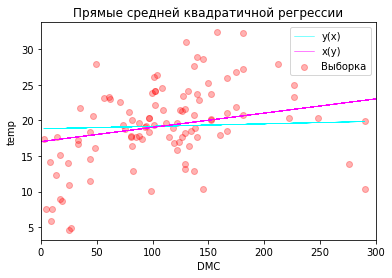

In [257]:
x_mean = data_DMC['DMC'].mean()
y_mean = data_temp['temp'].mean()
r_xy = np.corrcoef(data_DMC['DMC'], data_temp['temp'])[0][1]
S_x = data_DMC['DMC'].std() ** 2
S_y = data_temp['temp'].std() ** 2
yx = data_DMC['DMC'].apply(lambda x: y_mean + r_xy * (S_y / S_x) * (x - x_mean))
xy = data_temp['temp'].apply(lambda y: x_mean + r_xy * (S_x / S_y) * (y - y_mean))
plt.plot(data_DMC['DMC'], yx, 'aqua', label = 'y(x)', lw = 0.5)
plt.plot(xy, data_temp['temp'], 'magenta', label = 'x(y)', lw = 0.5)
plt.scatter(data_DMC['DMC'], data_temp['temp'], color = 'red', marker = 'o', alpha = 0.3, label = 'Выборка')
plt.xlabel('DMC')
plt.ylabel('temp')
ax = plt.gca()
ax.set_xlim([0, 300])
plt.legend()
plt.title('Прямые средней квадратичной регрессии')
plt.show()

Прямые средней квадратичной регрессии пересекаются в точке с координатами $(\bar{x}_в,\bar{y}_в)$. Линейная зависимость признаков на графике не наблюдается.

### Выборочное корреляционное отношение
Составим корреляционную таблицу для нахождения выборочного корреляционного отношения.


In [258]:
n = []
mean_xy = []
mean_yx = []
for i in range(k):
    n.append([])
    sum_x = 0
    if i == 0:
        n_temp = (data['temp'] >= interval_temp['temp'].apply(lambda x: x.left).astype('float')[i]) & (data['temp'] <= interval_temp['temp'].apply(lambda x: x.right).astype('float')[i])
    else:
        n_temp = (data['temp'] > interval_temp['temp'].apply(lambda x: x.left).astype('float')[i]) & (data['temp'] <= interval_temp['temp'].apply(lambda x: x.right).astype('float')[i])

    for j in range(k):
        if j == 0:
            n_DMC = (data['DMC'] >= interval_DMC['DMC'].apply(lambda x: x.left).astype('float')[j]) & (data['DMC'] <= interval_DMC['DMC'].apply(lambda x: x.right).astype('float')[j])
        else:
            n_DMC = (data['DMC'] > interval_DMC['DMC'].apply(lambda x: x.left).astype('float')[j]) & (data['DMC'] <= interval_DMC['DMC'].apply(lambda x: x.right).astype('float')[j])
        n[i].append(len(data[n_temp & n_DMC]))

        sum_x += table_DMC['x_i'][j] * n[i][j]
    mean_xy.append(sum_x)
for j in range(k):
    sum_y = 0
    for i in range(k):
        sum_y += table_temp['x_i'][i] * n[i][j]
    mean_yx.append(sum_y)

interval = pd.DataFrame(n)
interval.index = interval_temp['temp']
interval.columns = interval_DMC['DMC']
mean_xy /= interval.sum(axis=1)
mean_yx /= interval.sum()
correlation_table = interval.copy()
correlation_table['$n_{temp}$'] = correlation_table.sum(axis=1)
correlation_table.loc['$n_{DMC}$']= correlation_table.sum()
correlation_table[r'$\bar{x}_{y_i}$'] = mean_xy
correlation_table.loc[r'$\bar{y}_{x_i}$']= mean_yx
correlation_table.loc[r'$\bar{y}_{x_i}$', r'$\bar{x}_{y_i}$'] = correlation_table.loc[r'$\bar{y}_{x_i}$', '$n_{temp}$'] = correlation_table.loc['$n_{DMC}$', r'$\bar{x}_{y_i}$'] = ' '
correlation_table

DMC,"(2.4, 43.486]","(43.486, 84.571]","(84.571, 125.657]","(125.657, 166.743]","(166.743, 207.829]","(207.829, 248.914]","(248.914, 290.0]",$n_{temp}$,$\bar{x}_{y_i}$
temp,,,,,,,,,
"(4.6, 8.571]",5.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,5.0,22.943
"(8.571, 12.543]",4.000000,1.000000,1.000000,1.000000,0.00000,0.0000,1.0000,8.0,84.571438
"(12.543, 16.514]",3.000000,4.000000,1.000000,4.000000,0.00000,0.0000,1.0000,13.0,98.793385
"(16.514, 20.486]",4.000000,6.000000,16.000000,8.000000,1.00000,2.0000,1.0000,38.0,111.601395
"(20.486, 24.457]",1.000000,6.000000,6.000000,8.000000,3.00000,1.0000,0.0000,25.0,119.9051
"(24.457, 28.429]",0.000000,1.000000,3.000000,2.000000,3.00000,2.0000,0.0000,11.0,153.670136
"(28.429, 32.4]",0.000000,0.000000,0.000000,4.000000,1.00000,0.0000,0.0000,5.0,154.4172
$n_{DMC}$,17.000000,18.000000,27.000000,27.000000,8.00000,5.0000,3.0000,105.0,
$\bar{y}_{x_i}$,12.659559,18.941278,19.823833,21.147667,24.45725,22.4715,14.5285,,


Вычислим внутригрупповую, межгрупповую и общую дисперсии для признаков:

In [259]:
x_DMC = table_DMC.apply(lambda i: i['n_i']*(i['x_i']), axis = 1).sum()/105
x_temp = table_temp.apply(lambda i: i['n_i']*(i['x_i']), axis = 1).sum()/105
D_DMC = table_DMC.apply(lambda i: (i['x_i'] - x_DMC) ** 2 * i['n_i'], axis=1).sum() / 104
D_temp = table_temp.apply(lambda i: (i['x_i'] - x_temp) ** 2 * i['n_i'], axis=1).sum() / 104
Dx, Dy = 0, 0
for j in range(k):
    for i in range(k):
        Dx += (table_DMC['x_i'][j] - mean_xy.iloc[i]) ** 2 * interval.iloc[i, j]
        Dy += (table_temp['x_i'][j] - mean_yx.iloc[i]) ** 2 * interval.iloc[j, i]
Dx /= 105
Dy /= 105
D = pd.DataFrame(columns=['$D_{общ}$', '$D_{внгр}$', '$D_{межгр}$'])
D.loc['x'] = [D_DMC, Dx, D_DMC - Dx]
D.loc['y'] = [D_temp, Dy, D_temp - Dy]
D

,$D_{общ}$,$D_{внгр}$,$D_{межгр}$
x,3812.921565,3037.522878,775.398687
y,30.470993,18.929338,11.541655


Определим выборочное корреляционное отношение:

In [260]:
eta_xy = math.sqrt(D_DMC - Dx) / math.sqrt(D_DMC)
eta_yx = math.sqrt(D_temp - Dy) / math.sqrt(D_temp)
eta = pd.DataFrame(columns=[r'$\bar{\eta}$', '$|r_{xy}|$'])
eta.loc['DMC'] = [eta_xy, abs(r_xy)]
eta.loc['temp'] = [eta_yx, abs(r_xy)]
eta

,$\bar{\eta}$,$|r_{xy}|$
DMC,0.450955,0.417738
temp,0.615447,0.417738


 Неравенства $\eta_{xy} \geq |r_{xy}|$ и $\eta_{yx} \geq |r_{xy}|$ выполняются. По полученным результатам можно сделать вывод, что случайные величины связанны корреляционной зависимостью, характер которой неопределен (не линейная и не функциональная).

### Построение корреляционных кривых
Для заданной выборки построим корреляционную кривую параболического вида $y = \beta_2 x^2 + \beta_1 x + \beta_0 = -0.000415x^2 + 0.14204x + 10.270382$:

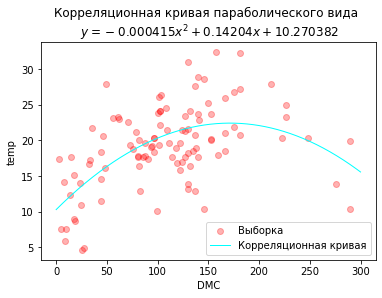

In [266]:
x = data_DMC['DMC'].values
y = data_temp['temp'].values
beta = lstsq(vstack((x ** 2, x, ones(len(x)))).T, y)[0]
xx = linspace(0, 300, 500)
plt.scatter(data_DMC['DMC'], data_temp['temp'], color = 'red', marker = 'o', alpha = 0.3, label = 'Выборка')
plt.plot(xx, beta[0] * xx ** 2 + beta[1] * xx + beta[2],'aqua',lw=1, label='Корреляционная кривая')
plt.xlabel('DMC')
plt.ylabel('temp')
plt.legend()
plt.title('Корреляционная кривая параболического вида \n $y = -0.000415x^2 + 0.14204x + 10.270382$')
plt.show()

Вычислим показатели качества регрессии: теоретический коэффициент детерминации $R^2$, среднюю квадратическую ошибку $S_\epsilon$, среднюю ошибку аппроксимации (приближения) $A$.

In [246]:
A = 0
S_eps = 0
for i in range(len(x)):
    S_eps += (y[i] - (beta[0] * x[i] **2 + beta[1] * x[i] + beta[2])) ** 2
    A += abs(y[i] - (beta[0] * x[i] **2 + beta[1] * x[i] + beta[2]))
values = pd.DataFrame(columns=['$R^2$', '$S_{\epsilon}$', '$A$'])
values.loc[0] = [1 - (S_eps / S_x), S_eps / 104, A / 105]
values

,$R^2$,$S_{\epsilon}$,$A$
0,0.433115,21.466854,3.671177


Для заданной выборки построим корреляционную кривую дробно-рационального вида: $y = \frac{x}{\beta_1x+\beta_0} = \frac{x}{0.04315x+0.61973}$

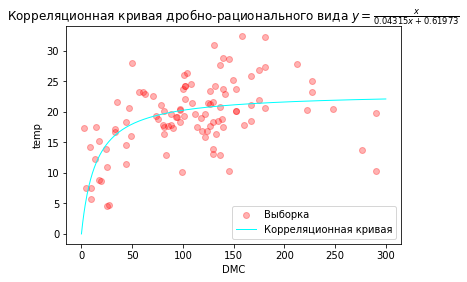

In [267]:
def func(x, beta_1, beta_0):
    return x / (beta_1*x +beta_0)


beta, _ = curve_fit(func, x, y)
plt.scatter(data_DMC['DMC'], data_temp['temp'], color = 'red', marker = 'o', alpha = 0.3, label = 'Выборка')
plt.plot(xx, func(xx, beta[0], beta[1]),'aqua',lw=1, label='Корреляционная кривая')
plt.xlabel('DMC')
plt.ylabel('temp')
plt.legend()
plt.title(r'Корреляционная кривая дробно-рационального вида $y = \frac{x}{0.04315x+0.61973}$')
plt.show()

Вычислим показатели качества регрессии: теоретический коэффициент детерминации $R^2$, среднюю квадратическую ошибку $S_\epsilon$, среднюю ошибку аппроксимации (приближения) $A$.

In [268]:
A = 0
S_eps = 0
for i in range(len(x)):
    S_eps += (y[i] - x[i]/(beta[0]*x[i]+beta[1])) ** 2
    A += abs(y[i] - x[i]/(beta[0]*x[i]+beta[1]))
values = pd.DataFrame(columns=['$R^2$', '$S_{\epsilon}$', '$A$'])
values.loc[0] = [1 - (S_eps / S_x), S_eps / 104, A / 105]
values

,$R^2$,$S_{\epsilon}$,$A$
0,0.368872,23.89961,3.73689


По результатам построенных графиков корреляционных кривых и вычисленных показателях качества регрессии, можно сделать вывод, что корреляционная кривая параболического вида немного лучше характеризует корреляционную зависимость между признаками. Но корреляционная зависимость между признаками не может быть выражена параболической или дробно-рациональной функцией.

## Выводы

В процессе выполнения лабораторной работы двумерная выборка была отображена на графике, для заданной выборки построены уравнения среднеквадратической регрессии $x$ на $y$ и $y$ на $x$, отображены построенные кривые на множестве выборки. Была составлена корреляционная таблица для нахождения выборочного корреляционного отношения, вычислены внутригрупповые, межгрупповые и общие дисперсии, полученные результаты удовлетворяют свойствам выборочного корреляционного отношения. Для заданной выборки построены корреляционные кривые двух видов - параболического и дробно-рационального, корреляционная зависимость между признаками не может быть выражена построенными кривыми.